In [54]:
import numpy as np
import pandas as pd
from shapely.geometry import Polygon,box,Point
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd

import osmnx as ox
import networkx as nx
from osmnx.distance import nearest_nodes

import matplotlib.pyplot as plt
import random

In [55]:
# "C:\Users\zliu33\Downloads\CENSUS2010_BLK_BG_TRCT_SHP\CENSUS2010BLOCKS_POLY.shp"
# "C:\Users\zliu33\Downloads\CENSUS2020_BLK_BG_TRCT\CENSUS2020BLOCKGROUPS_POLY.shp"

blockgroups_bounds = gpd.read_file(r'C:\Users\zliu33\Downloads\CENSUS2020_BLK_BG_TRCT\CENSUS2020BLOCKGROUPS_POLY.shp').to_crs(crs='EPSG:4326')

In [56]:
blockgroups_bounds.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [57]:
# "C:\Users\zliu33\Downloads\CENSUS2010_BLK_BG_TRCT_SHP\CENSUS2010TRACTS_POLY.shp"
# "C:\Users\zliu33\Downloads\CENSUS2020_BLK_BG_TRCT\CENSUS2020TRACTS_POLY.shp"

tract_bounds = gpd.read_file(r'C:\Users\zliu33\Downloads\CENSUS2020_BLK_BG_TRCT\CENSUS2020TRACTS_POLY.shp').to_crs(crs='EPSG:4326')

In [58]:
tract_bounds.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [59]:
#clip to smaller extent
region_bounds = (-71.22648, 42.21433, -70.967401, 42.44459)

blockgroups_bounds = blockgroups_bounds.clip(mask=region_bounds)
tract_bounds = tract_bounds.clip(mask=region_bounds)

<AxesSubplot:>

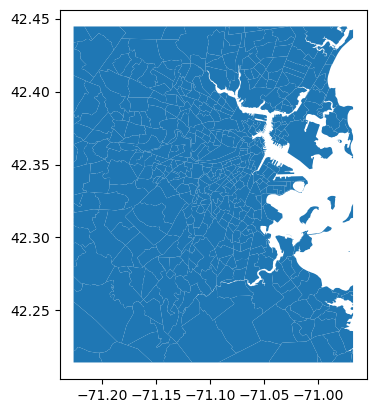

In [60]:
tract_bounds.plot()

<AxesSubplot:>

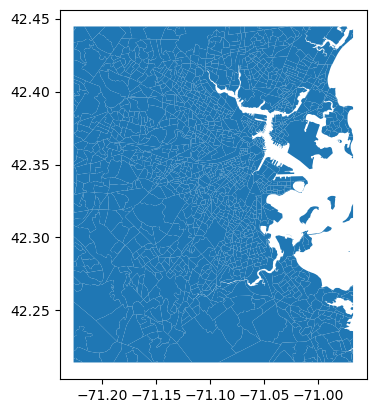

In [61]:
blockgroups_bounds.plot()

In [62]:
tract_bounds.head()

,STATEFP20,COUNTYFP20,TRACTCE20,GEOID20,NAME20,NAMELSAD20,MTFCC20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,AREA_SQFT,AREA_ACRES,HOUSING20,POP20,BLK20_CNT,SHAPE_AREA,SHAPE_LEN,geometry
647,25,021,419800,25021419800,4198,Census Tract 4198,G5020,5991398.0,1271551.0,+42.2005902,-071.0225606,7.817186e+07,1794.59,1822,4716,71,7.262432e+06,16617.581200,"POLYGON ((-71.00055 42.21433, -71.00039 42.215..."
1325,25,021,419100,25021419100,4191,Census Tract 4191,G5020,7073489.0,161219.0,+42.2179715,-071.0218414,7.786795e+07,1787.61,2314,6329,101,7.234198e+06,13021.253814,"POLYGON ((-71.04494 42.21433, -71.04494 42.215..."
1254,25,021,980000,25021980000,9800,Census Tract 9800,G5020,7916916.0,49996.0,+42.2182832,-071.0547891,8.574870e+07,1968.53,1,8,8,7.966346e+06,12738.916486,"POLYGON ((-71.09215 42.21433, -71.08559 42.216..."
1423,25,021,416101,25021416101,4161.01,Census Tract 4161.01,G5020,9633494.0,78287.0,+42.2404604,-071.0710504,1.045290e+08,2399.66,2181,6274,81,9.711099e+06,14491.493578,"POLYGON ((-71.06116 42.25921, -71.05988 42.258..."
537,25,021,416300,25021416300,4163,Census Tract 4163,G5020,2661351.0,107202.0,+42.2627175,-071.0767067,2.906369e+07,667.21,1893,5005,69,2.700116e+06,7948.666350,"POLYGON ((-71.06116 42.25921, -71.06181 42.259..."


In [63]:
tract_bounds.columns

Index(['STATEFP20', 'COUNTYFP20', 'TRACTCE20', 'GEOID20', 'NAME20',
       'NAMELSAD20', 'MTFCC20', 'ALAND20', 'AWATER20', 'INTPTLAT20',
       'INTPTLON20', 'AREA_SQFT', 'AREA_ACRES', 'HOUSING20', 'POP20',
       'BLK20_CNT', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry'],
      dtype='object')

In [64]:
### centroids

In [65]:
blockgroups_bounds.to_crs(crs='EPSG:26986',inplace=True)
tract_bounds.to_crs(crs='EPSG:26986',inplace=True)

In [66]:
#calculate centroids:
blockgroup_centroids = blockgroups_bounds.centroid
tract_centroids = tract_bounds.centroid

<AxesSubplot:>

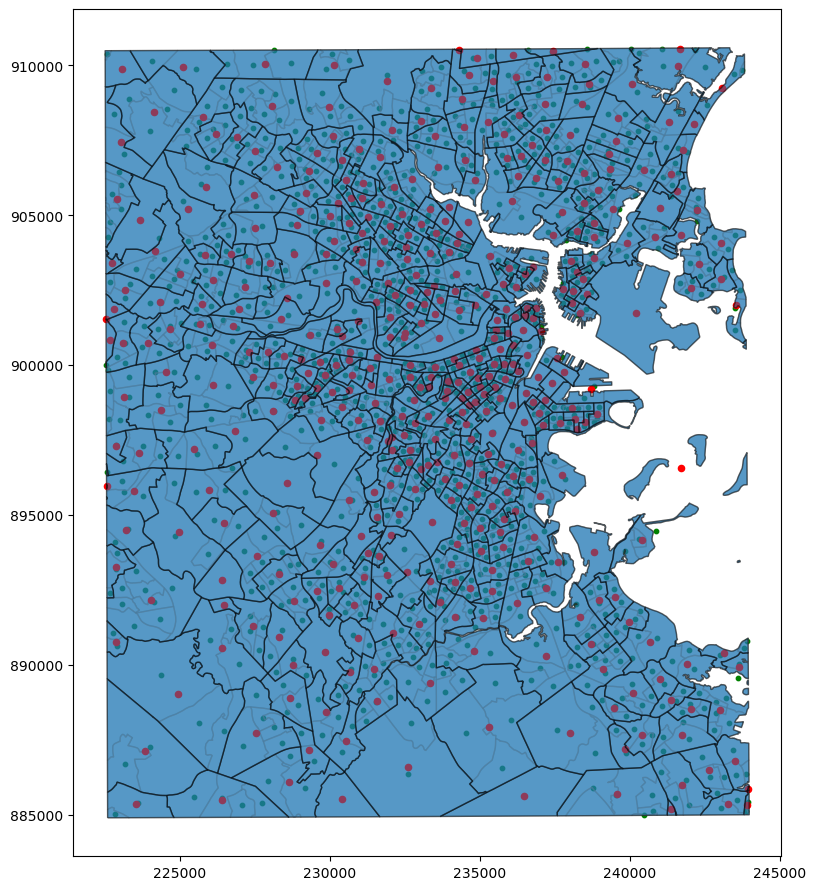

In [67]:
#plot everything: census tracts, census block groups, tract centroids, block group centroids.

fig,ax = plt.subplots(1,1,sharex=True,sharey=True,figsize=(11,11))
blockgroup_centroids.plot(ax=ax,color="Green", markersize=10)
blockgroups_bounds.plot(ax=ax,alpha=0.5,edgecolor="Grey")
tract_centroids.plot(ax=ax,color="Red", markersize=20)
tract_bounds.plot(ax=ax,alpha=0.5,edgecolor="Black")

In [68]:
sch_bos = gpd.read_file(r'C:\Users\zliu33\Downloads\Pre-kindergarten to High School Buildings\GISDATA_SCHOOLS_PTPoint.shp')

sch_bos = sch_bos.clip(mask=region_bounds)
sch_bos.head()

,schid,name,address,town_mail,town,zipcode,phone,grades,type,type_desc,dist_name,dist_code,ma_addr_id,type_desc2,geometry
175,01890803,Delphi Academy,564 Blue Hill Avenue,Milton,MILTON,02186,617-333-9610,"K,01,02,03,04,05,06,07,08",PRI,Private,NaN,NaN,2788094,NaN,POINT (-71.10333 42.24693)
211,01890020,Tucker School,187 Blue Hills Parkway,Milton,MILTON,02186,617-696-4291,"PK,K,01,02,03,04,05",ELE,Public Elementary,Milton,01890000,2788361,NaN,POINT (-71.09457 42.26082)
914,01890815,Wilson-Kindelan School,158 Blue Hills Parkway,Milton,MILTON,02186,339-237-0319,"K,01,02,03,04",PRI,Private,NaN,NaN,2785261,NaN,POINT (-71.09274 42.26152)
680,04160305,Boston Preparatory Charter Public School,885 River Street,Hyde Park,BOSTON,02136,617-333-6688,"06,07,08,09,10,11,12",CHA,Charter,Boston Preparatory Charter,04160000,35077096,NaN,POINT (-71.11054 42.26213)
620,00350154,Chittick Elementary School,154 Ruskindale Road,Mattapan,BOSTON,02126,617-635-8652,"PK,K,01,02,03,04,05,06",ELE,Public Elementary,Boston,00350000,35169350,NaN,POINT (-71.10478 42.26726)


In [69]:
sch_bos = sch_bos[sch_bos['type'] == 'ELE']
sch_bos.head()

,schid,name,address,town_mail,town,zipcode,phone,grades,type,type_desc,dist_name,dist_code,ma_addr_id,type_desc2,geometry
211,01890020,Tucker School,187 Blue Hills Parkway,Milton,MILTON,02186,617-696-4291,"PK,K,01,02,03,04,05",ELE,Public Elementary,Milton,01890000,2788361,NaN,POINT (-71.09457 42.26082)
620,00350154,Chittick Elementary School,154 Ruskindale Road,Mattapan,BOSTON,02126,617-635-8652,"PK,K,01,02,03,04,05,06",ELE,Public Elementary,Boston,00350000,35169350,NaN,POINT (-71.10478 42.26726)
758,00350008,Ellison-Parks Early Education School,108 Babson Street,Mattapan,BOSTON,02126,617-635-7680,"PK,K,01,02,03",ELE,Public Elementary,Boston,00350000,35007425,NaN,POINT (-71.09189 42.27179)
66,01890010,Glover School,255 Canton Avenue,Milton,MILTON,02186,617-696-4288,"K,01,02,03,04,05",ELE,Public Elementary,Milton,01890000,2789966,NaN,POINT (-71.07546 42.26146)
719,00350054,Taylor Elementary School,1060 Morton Street,Mattapan,BOSTON,02126,617-635-8731,"PK,K,01,02,03,04,05,06",ELE,Public Elementary,Boston,00350000,35158201,NaN,POINT (-71.07743 42.27786)


In [70]:
sch_bos.to_crs(crs='EPSG:26986',inplace=True)

In [71]:
print("Tract Bounds:", tract_bounds.total_bounds)
print("School Locations Bounds:", sch_bos.total_bounds)


Tract Bounds: [222502.33308368 884911.48339281 243976.06200208 910585.47288281]
School Locations Bounds: [222687.40665117 884940.74125803 242806.63424441 910076.09693219]


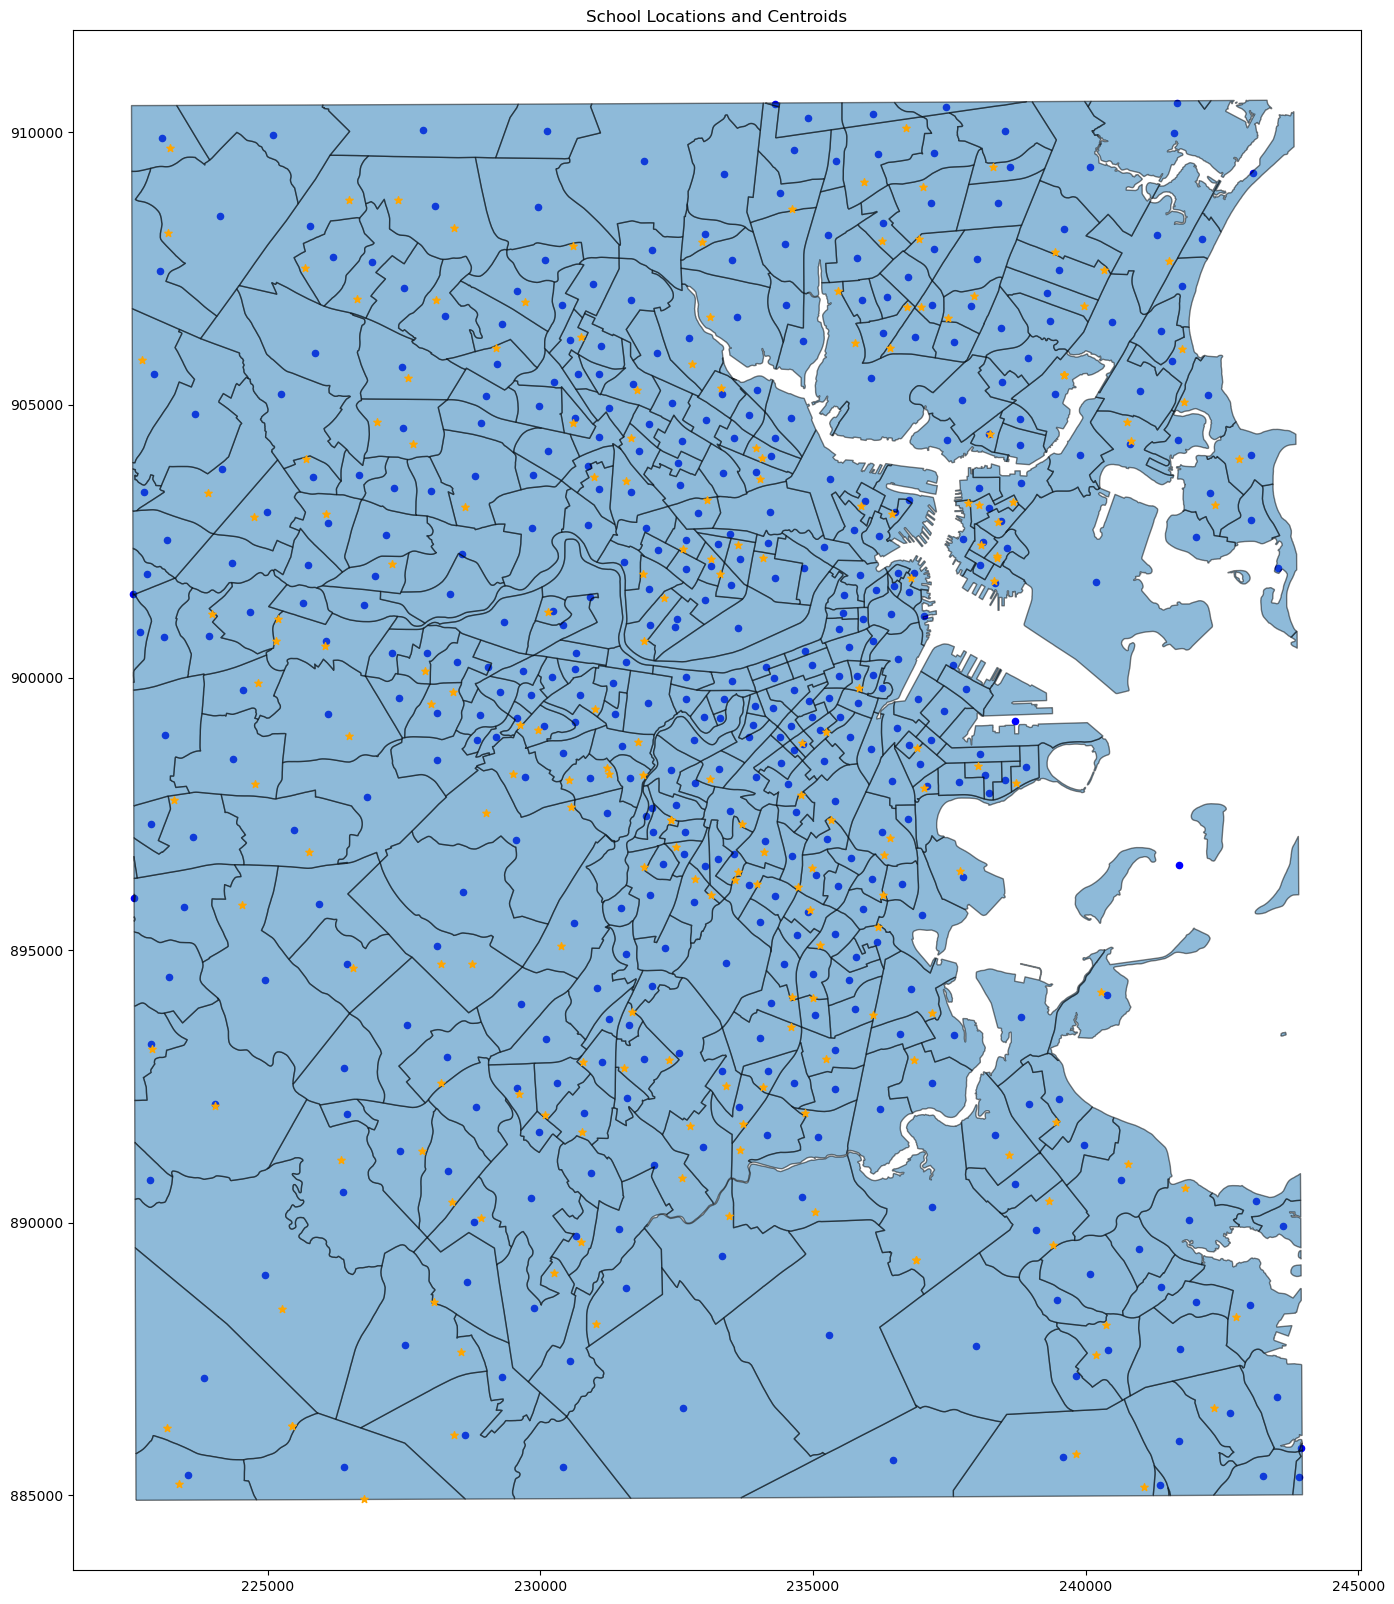

In [72]:
#bounds = tract_bounds.total_bounds

fig,ax = plt.subplots(1,1,sharex=True,sharey=True,figsize=(20,20))
#blockgroup_centroids.plot(ax=ax,color="Green", markersize=10)
#blockgroups_bounds.plot(ax=ax,alpha=0.5,edgecolor="Grey")
tract_centroids.plot(ax=ax,color="blue", markersize=20)
tract_bounds.plot(ax=ax,alpha=0.5,edgecolor="Black")
sch_bos.plot(ax=ax, marker='*', color='orange', markersize=30)

#ax.set_xlim(bounds[0], bounds[2])  # Set x limits as minx to maxx
#ax.set_ylim(bounds[1], bounds[3])  # Set y limits as miny to maxy

# Set plot title and show plot
plt.title('School Locations and Centroids')
plt.show()

In [73]:
# "C:\Users\zliu33\Downloads\Census Tract Level.csv"

census_bos = gpd.read_file(r'C:\Users\zliu33\Downloads\Census Tract Level.csv')

census_bos.head()

,Always equal to ACS Summary File identification,State Postal Abbreviation,Summary Level,Geographic Component,US,Census Region,Census Division,State (FIPS Code),County of current residence,County Subdivision (FIPS),...,Population 3 Years and Over Enrolled in School: Public School: Pre-School,Population 3 Years and Over Enrolled in School: Public School: K-8,Population 3 Years and Over Enrolled in School: Public School: 9-12,Population 3 Years and Over Enrolled in School: Public School: College,Population 3 Years and Over Enrolled in School: Private School,Population 3 Years and Over Enrolled in School: Private School: Pre-School,Population 3 Years and Over Enrolled in School: Private School: K-8,Population 3 Years and Over Enrolled in School: Private School: 9-12,Population 3 Years and Over Enrolled in School: Private School: College,geometry
0,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATE,Geo_COUNTY,Geo_COUSUB,...,SE_A12006_003,SE_A12006_004,SE_A12006_005,SE_A12006_006,SE_A12006_007,SE_A12006_008,SE_A12006_009,SE_A12006_010,SE_A12006_011,None
1,ACSSF,ma,140,00,,,,25,001,,...,16,127,80,38,112,9,0,0,103,None
2,ACSSF,ma,140,00,,,,25,001,,...,37,390,64,57,195,63,15,14,103,None
3,ACSSF,ma,140,00,,,,25,001,,...,0,47,0,71,0,0,0,0,0,None
4,ACSSF,ma,140,00,,,,25,001,,...,0,125,99,127,34,13,0,0,21,None


In [74]:
census_bos = census_bos[1:]
census_bos.head()

,Always equal to ACS Summary File identification,State Postal Abbreviation,Summary Level,Geographic Component,US,Census Region,Census Division,State (FIPS Code),County of current residence,County Subdivision (FIPS),...,Population 3 Years and Over Enrolled in School: Public School: Pre-School,Population 3 Years and Over Enrolled in School: Public School: K-8,Population 3 Years and Over Enrolled in School: Public School: 9-12,Population 3 Years and Over Enrolled in School: Public School: College,Population 3 Years and Over Enrolled in School: Private School,Population 3 Years and Over Enrolled in School: Private School: Pre-School,Population 3 Years and Over Enrolled in School: Private School: K-8,Population 3 Years and Over Enrolled in School: Private School: 9-12,Population 3 Years and Over Enrolled in School: Private School: College,geometry
1,ACSSF,ma,140,00,,,,25,001,,...,16,127,80,38,112,9,0,0,103,None
2,ACSSF,ma,140,00,,,,25,001,,...,37,390,64,57,195,63,15,14,103,None
3,ACSSF,ma,140,00,,,,25,001,,...,0,47,0,71,0,0,0,0,0,None
4,ACSSF,ma,140,00,,,,25,001,,...,0,125,99,127,34,13,0,0,21,None
5,ACSSF,ma,140,00,,,,25,001,,...,9,105,164,15,115,63,41,0,11,None


In [75]:
census_bos.columns

Index(['Always equal to ACS Summary File identification',
       'State Postal Abbreviation', 'Summary Level', 'Geographic Component',
       'US', 'Census Region', 'Census Division', 'State (FIPS Code)',
       'County of current residence', 'County Subdivision (FIPS)',
       'Place (FIPS Code)', 'Census Tract', 'Block Group', 'Consolidated City',
       'American Indian Area/Alaska Native Area/ Hawaiian Home Land (Census)',
       'American Indian Area/Alaska Native Area/ Hawaiian Home Land (FIPS)',
       'American Indian Trust Land/Hawaiian Home Land Indicator',
       'American Indian Tribal Subdivision (FIPS)',
       'Alaska Native Regional Corporation (FIPS)',
       'Metropolitan and Micropolitan Statistical Area',
       'Combined Statistical Area',
       'Metropolitan Statistical Area-Metropolitan Division',
       'Metropolitan Area Central City',
       'Metropolitan/Micropolitan Indicator Flag',
       'New England City and Town Area',
       'New England City and Town 

In [76]:
columns_to_select = [
       #'State (FIPS Code)',
       #'County of current residence', 
       #'County Subdivision (FIPS)',
       #'Place (FIPS Code)', 
       'Census Tract', 
       #'Block Group', 
       #'Consolidated City',
       #'American Indian Area/Alaska Native Area/ Hawaiian Home Land (Census)',
       #'American Indian Area/Alaska Native Area/ Hawaiian Home Land (FIPS)',
       #'American Indian Trust Land/Hawaiian Home Land Indicator',
       #'American Indian Tribal Subdivision (FIPS)',
       #'Alaska Native Regional Corporation (FIPS)',
       #'Metropolitan and Micropolitan Statistical Area',
       #'Combined Statistical Area',
       #'Metropolitan Statistical Area-Metropolitan Division',
       #'Metropolitan Area Central City',
       #'Metropolitan/Micropolitan Indicator Flag',
       #'New England City and Town Area',
       #'New England City and Town Combined Statistical Area',
       #'New England City and Town Area Division', 'Urban Area',
       #'Current Congressional District ***',
       #'State Legislative District Upper', 'State Legislative District Lower',
       #'5-digit ZIP Code Tabulation Area', 'Subminor Civil Division (FIPS)',
       #'State-School District (Elementary)',
       #'State-School District (Secondary)', 'State-School District (Unified)',
       #'Urban/Rural', 'Principal City Indicator',
       #'Public Use Microdata Area â€“ 5% File', 'Geographic Identifier',
       'Area Name', 
       #'Tribal Tract', 'Tribal Block Group', 
       #'Qualifying Name',
       'FIPS', 
       #'Area (Land)', 'Area (Water)',
       #'Place (State FIPS + Place FIPS)', 'ZIP Code Tabulation Area (3-digit)',
       #'Total Population', 'Population Density (Per Sq. Mile)', 'Area Total:',
       #'Area Total: Area (Land)', 'Area Total: Area (Water)',
       #'Total Population:', 'Total Population: Under 5 Years',
       'Total Population: 5 to 9 Years', 'Total Population: 10 to 14 Years',
       #'Total Population: 15 to 17 Years', 'Total Population: 18 to 24 Years',
       #'Total Population: 25 to 34 Years', 'Total Population: 35 to 44 Years',
       #'Total Population: 45 to 54 Years', 'Total Population: 55 to 64 Years',
       #'Total Population: 65 to 74 Years', 'Total Population: 75 to 84 Years',
       #'Total Population: 85 Years and Over', 'Population 3 Years and Over:',
       #'Population 3 Years and Over: Enrolled in School',
       #'Population 3 Years and Over: Not Enrolled in School',
       #'Population 3 Years and Over Enrolled in School',
       #'Population 3 Years and Over Enrolled in School: Public School',
       #'Population 3 Years and Over Enrolled in School: Public School: Pre-School',
       'Population 3 Years and Over Enrolled in School: Public School: K-8',
       'Population 3 Years and Over Enrolled in School: Public School: 9-12']
       #'Population 3 Years and Over Enrolled in School: Public School: College',
       #'Population 3 Years and Over Enrolled in School: Private School',
       #'Population 3 Years and Over Enrolled in School: Private School: Pre-School',
       #'Population 3 Years and Over Enrolled in School: Private School: K-8',
       #'Population 3 Years and Over Enrolled in School: Private School: 9-12',
       #'Population 3 Years and Over Enrolled in School: Private School: College',
       #'geometry']


census_bos_new = census_bos[columns_to_select]

In [77]:
census_bos_new.head()

,Census Tract,Area Name,FIPS,Total Population: 5 to 9 Years,Total Population: 10 to 14 Years,Population 3 Years and Over Enrolled in School: Public School: K-8,Population 3 Years and Over Enrolled in School: Public School: 9-12
1,010100,Census Tract 101,25001010100,80,43,127,80
2,010206,Census Tract 102.06,25001010206,241,209,390,64
3,010208,Census Tract 102.08,25001010208,31,16,47,0
4,010304,Census Tract 103.04,25001010304,50,99,125,99
5,010306,Census Tract 103.06,25001010306,116,132,105,164


In [78]:
census_bos_new.shape

(1620, 7)

In [79]:
tract_bounds.columns

Index(['STATEFP20', 'COUNTYFP20', 'TRACTCE20', 'GEOID20', 'NAME20',
       'NAMELSAD20', 'MTFCC20', 'ALAND20', 'AWATER20', 'INTPTLAT20',
       'INTPTLON20', 'AREA_SQFT', 'AREA_ACRES', 'HOUSING20', 'POP20',
       'BLK20_CNT', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry'],
      dtype='object')

In [80]:
columns_to_select = [#'STATEFP20', 
                     #'COUNTYFP20', 
                     #'TRACTCE20', 
                     'GEOID20', 
                     #'NAME20',
                     'NAMELSAD20', 
                     #'MTFCC20', 
                     #'ALAND20', 
                     #'AWATER20', 
                     'INTPTLAT20',
                     'INTPTLON20', 
                     #'AREA_SQFT', 
                     #'AREA_ACRES', 
                     #'HOUSING20', 
                     #'POP20',
                     #'BLK20_CNT', 
                     #'SHAPE_AREA', 
                     #'SHAPE_LEN', 
                     'geometry']

tract_bounds_new = tract_bounds[columns_to_select]

In [81]:
tract_bounds_new.head()

,GEOID20,NAMELSAD20,INTPTLAT20,INTPTLON20,geometry
647,25021419800,Census Tract 4198,+42.2005902,-071.0225606,"POLYGON ((241238.659 884996.045, 241251.599 88..."
1325,25021419100,Census Tract 4191,+42.2179715,-071.0218414,"POLYGON ((237573.941 884975.533, 237573.317 88..."
1254,25021980000,Census Tract 9800,+42.2182832,-071.0547891,"POLYGON ((233675.738 884955.806, 234216.202 88..."
1423,25021416101,Census Tract 4161.01,+42.2404604,-071.0710504,"POLYGON ((236209.041 889953.080, 236314.968 88..."
537,25021416300,Census Tract 4163,+42.2627175,-071.0767067,"POLYGON ((236209.041 889953.080, 236155.003 88..."


In [82]:
tract_bounds_new.shape

(459, 5)

In [83]:
merged_census = pd.merge(tract_bounds_new, census_bos_new, left_on='GEOID20', right_on='FIPS', how='inner')

In [84]:
merged_census.shape

(459, 12)

In [85]:
merged_census.head()

,GEOID20,NAMELSAD20,INTPTLAT20,INTPTLON20,geometry,Census Tract,Area Name,FIPS,Total Population: 5 to 9 Years,Total Population: 10 to 14 Years,Population 3 Years and Over Enrolled in School: Public School: K-8,Population 3 Years and Over Enrolled in School: Public School: 9-12
0,25021419800,Census Tract 4198,+42.2005902,-071.0225606,"POLYGON ((241238.659 884996.045, 241251.599 88...",419800,Census Tract 4198,25021419800,188,264,353,231
1,25021419100,Census Tract 4191,+42.2179715,-071.0218414,"POLYGON ((237573.941 884975.533, 237573.317 88...",419100,Census Tract 4191,25021419100,463,299,600,360
2,25021980000,Census Tract 9800,+42.2182832,-071.0547891,"POLYGON ((233675.738 884955.806, 234216.202 88...",980000,Census Tract 9800,25021980000,0,0,0,0
3,25021416101,Census Tract 4161.01,+42.2404604,-071.0710504,"POLYGON ((236209.041 889953.080, 236314.968 88...",416101,Census Tract 4161.01,25021416101,489,488,749,264
4,25021416300,Census Tract 4163,+42.2627175,-071.0767067,"POLYGON ((236209.041 889953.080, 236155.003 88...",416300,Census Tract 4163,25021416300,446,486,818,196


In [86]:
merged_census.columns

Index(['GEOID20', 'NAMELSAD20', 'INTPTLAT20', 'INTPTLON20', 'geometry',
       'Census Tract', 'Area Name', 'FIPS', 'Total Population: 5 to 9 Years',
       'Total Population: 10 to 14 Years',
       'Population 3 Years and Over Enrolled in School: Public School: K-8',
       'Population 3 Years and Over Enrolled in School: Public School: 9-12'],
      dtype='object')

In [87]:
merged_census.crs

<Derived Projected CRS: EPSG:26986>
Name: NAD83 / Massachusetts Mainland
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Massachusetts onshore - counties of Barnstable; Berkshire; Bristol; Essex; Franklin; Hampden; Hampshire; Middlesex; Norfolk; Plymouth; Suffolk; Worcester.
- bounds: (-73.5, 41.46, -69.86, 42.89)
Coordinate Operation:
- name: SPCS83 Massachusetts Mainland zone (meters)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

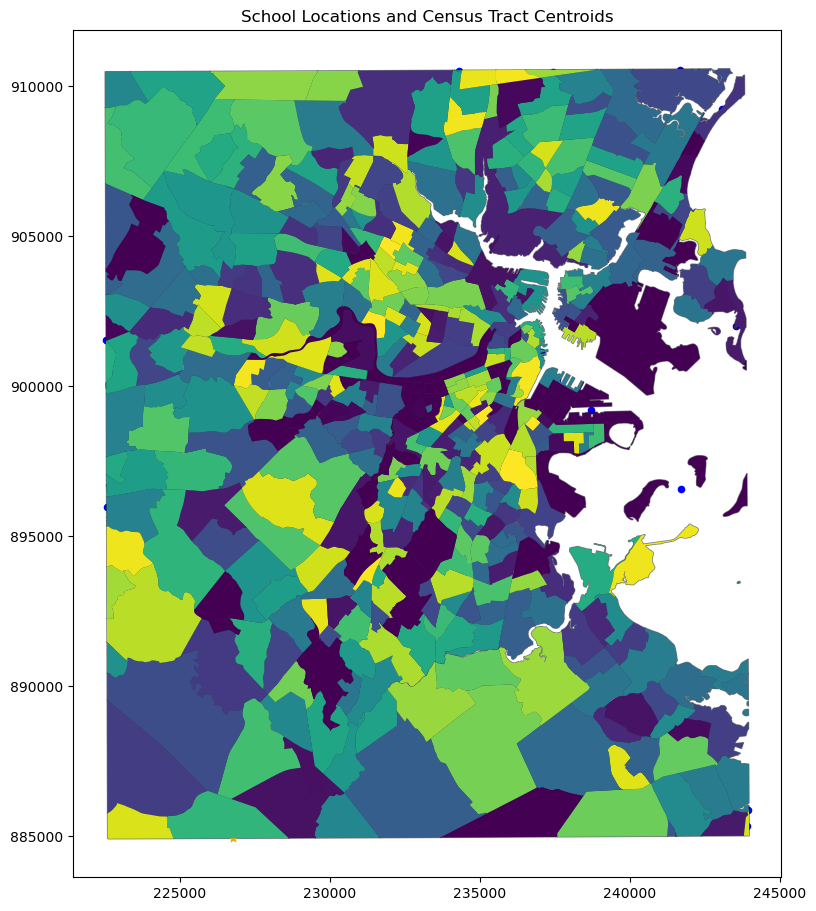

In [88]:
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(11, 11))

# Assuming 'tract_centroids' and 'tract_bounds' are pre-defined GeoDataFrames
tract_centroids.plot(ax=ax, color="blue", markersize=20)
tract_bounds.plot(ax=ax, alpha=0.5, edgecolor="Black")

sch_bos.plot(ax=ax, marker='*', color='orange', markersize=30)

merged_census.plot(column='Total Population: 5 to 9 Years', ax=ax, legend=False,
                   cmap='viridis')


# Set plot title and show plot
plt.title('School Locations and Census Tract Centroids')
plt.show()

In [89]:
####### break

In [90]:
sch_bos.head()

,schid,name,address,town_mail,town,zipcode,phone,grades,type,type_desc,dist_name,dist_code,ma_addr_id,type_desc2,geometry
211,01890020,Tucker School,187 Blue Hills Parkway,Milton,MILTON,02186,617-696-4291,"PK,K,01,02,03,04,05",ELE,Public Elementary,Milton,01890000,2788361,NaN,POINT (233451.271 890118.836)
620,00350154,Chittick Elementary School,154 Ruskindale Road,Mattapan,BOSTON,02126,617-635-8652,"PK,K,01,02,03,04,05,06",ELE,Public Elementary,Boston,00350000,35169350,NaN,POINT (232605.544 890829.554)
758,00350008,Ellison-Parks Early Education School,108 Babson Street,Mattapan,BOSTON,02126,617-635-7680,"PK,K,01,02,03",ELE,Public Elementary,Boston,00350000,35007425,NaN,POINT (233666.673 891338.024)
66,01890010,Glover School,255 Canton Avenue,Milton,MILTON,02186,617-696-4288,"K,01,02,03,04,05",ELE,Public Elementary,Milton,01890000,2789966,NaN,POINT (235027.459 890197.335)
719,00350054,Taylor Elementary School,1060 Morton Street,Mattapan,BOSTON,02126,617-635-8731,"PK,K,01,02,03,04,05,06",ELE,Public Elementary,Boston,00350000,35158201,NaN,POINT (234856.186 892018.283)


In [91]:
sch_bos.columns

Index(['schid', 'name', 'address', 'town_mail', 'town', 'zipcode', 'phone',
       'grades', 'type', 'type_desc', 'dist_name', 'dist_code', 'ma_addr_id',
       'type_desc2', 'geometry'],
      dtype='object')

In [92]:
columns_to_select = ['schid', 
                     'name', 
                     #'address', 
                     #'town_mail', 
                     #'town', 
                     'zipcode', 
                     #'phone',
                     #'grades', 
                     'type', 
                     #'type_desc', 
                     'dist_name', 
                     'dist_code', 
                     'ma_addr_id',
                     #'type_desc2', 
                     'geometry' 
                     ]

sch_bos_new = sch_bos[columns_to_select]

In [93]:
sch_bos_new.crs

<Derived Projected CRS: EPSG:26986>
Name: NAD83 / Massachusetts Mainland
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Massachusetts onshore - counties of Barnstable; Berkshire; Bristol; Essex; Franklin; Hampden; Hampshire; Middlesex; Norfolk; Plymouth; Suffolk; Worcester.
- bounds: (-73.5, 41.46, -69.86, 42.89)
Coordinate Operation:
- name: SPCS83 Massachusetts Mainland zone (meters)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [94]:
merged_census.crs

<Derived Projected CRS: EPSG:26986>
Name: NAD83 / Massachusetts Mainland
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Massachusetts onshore - counties of Barnstable; Berkshire; Bristol; Essex; Franklin; Hampden; Hampshire; Middlesex; Norfolk; Plymouth; Suffolk; Worcester.
- bounds: (-73.5, 41.46, -69.86, 42.89)
Coordinate Operation:
- name: SPCS83 Massachusetts Mainland zone (meters)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [95]:
# before this cell, everything is correct
# try to create the OD pairs

In [96]:
merged_census['centroid'] = merged_census.geometry.centroid

In [97]:
print(merged_census.shape)
print(sch_bos_new.shape)

(459, 13)
(199, 8)


In [98]:
print(sch_bos_new.columns)

Index(['schid', 'name', 'zipcode', 'type', 'dist_name', 'dist_code',
       'ma_addr_id', 'geometry'],
      dtype='object')


In [99]:
print(merged_census.columns)

Index(['GEOID20', 'NAMELSAD20', 'INTPTLAT20', 'INTPTLON20', 'geometry',
       'Census Tract', 'Area Name', 'FIPS', 'Total Population: 5 to 9 Years',
       'Total Population: 10 to 14 Years',
       'Population 3 Years and Over Enrolled in School: Public School: K-8',
       'Population 3 Years and Over Enrolled in School: Public School: 9-12',
       'centroid'],
      dtype='object')


In [100]:
# Use intersects instead of within
schools_in_tracts = gpd.sjoin(sch_bos_new, merged_census, how="inner", predicate="intersects")

In [101]:
schools_in_tracts.head()

,schid,name,zipcode,type,dist_name,dist_code,ma_addr_id,geometry,index_right,GEOID20,...,INTPTLAT20,INTPTLON20,Census Tract,Area Name,FIPS,Total Population: 5 to 9 Years,Total Population: 10 to 14 Years,Population 3 Years and Over Enrolled in School: Public School: K-8,Population 3 Years and Over Enrolled in School: Public School: 9-12,centroid
211,01890020,Tucker School,02186,ELE,Milton,01890000,2788361,POINT (233451.271 890118.836),332,25021416200,...,+42.2545227,-071.0958574,416200,Census Tract 4162,25021416200,575,432,889,183,POINT (233331.478 889398.206)
620,00350154,Chittick Elementary School,02126,ELE,Boston,00350000,35169350,POINT (232605.544 890829.554),334,25025140400,...,+42.2692219,-071.1118088,140400,Census Tract 1404,25025140400,618,464,908,396,POINT (232091.259 891058.361)
758,00350008,Ellison-Parks Early Education School,02126,ELE,Boston,00350000,35007425,POINT (233666.673 891338.024),5,25025101002,...,+42.2740572,-071.0853267,101002,Census Tract 1010.02,25025101002,337,422,724,222,POINT (234155.791 891603.319)
66,01890010,Glover School,02186,ELE,Milton,01890000,2789966,POINT (235027.459 890197.335),4,25021416300,...,+42.2627175,-071.0767067,416300,Census Tract 4163,25021416300,446,486,818,196,POINT (234802.862 890481.181)
719,00350054,Taylor Elementary School,02126,ELE,Boston,00350000,35158201,POINT (234856.186 892018.283),6,25025100900,...,+42.2740065,-071.0742308,100900,Census Tract 1009,25025100900,292,163,398,163,POINT (235090.822 891575.807)


In [102]:
schools_in_tracts.columns

Index(['schid', 'name', 'zipcode', 'type', 'dist_name', 'dist_code',
       'ma_addr_id', 'geometry', 'index_right', 'GEOID20', 'NAMELSAD20',
       'INTPTLAT20', 'INTPTLON20', 'Census Tract', 'Area Name', 'FIPS',
       'Total Population: 5 to 9 Years', 'Total Population: 10 to 14 Years',
       'Population 3 Years and Over Enrolled in School: Public School: K-8',
       'Population 3 Years and Over Enrolled in School: Public School: 9-12',
       'centroid'],
      dtype='object')

In [103]:
print(merged_census.total_bounds)
print(sch_bos_new.total_bounds)

[222502.33308368 884911.48339281 243976.06200208 910585.47288281]
[222687.40665117 884940.74125803 242806.63424441 910076.09693219]


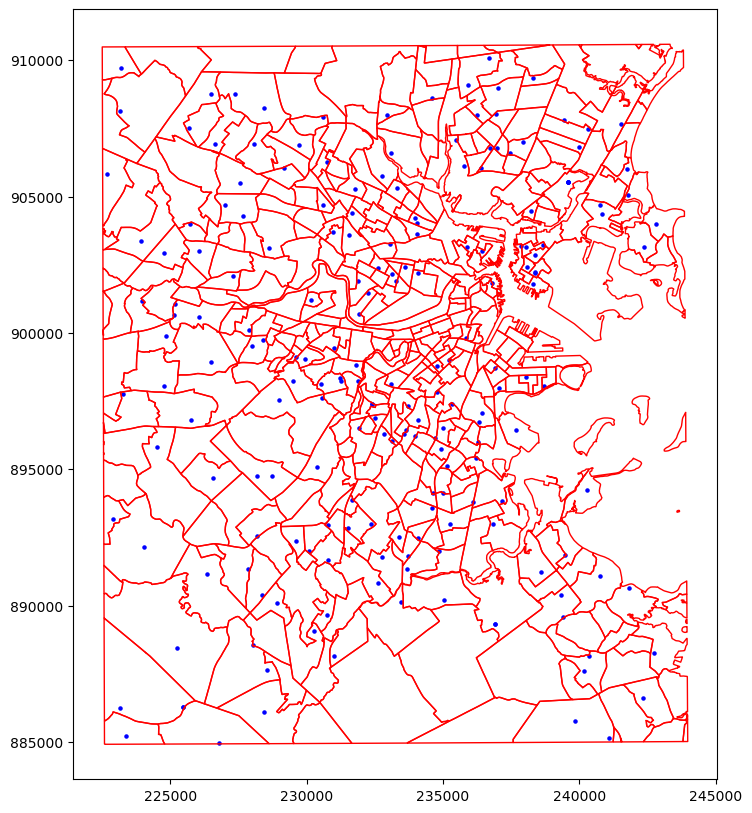

In [104]:
fig, ax = plt.subplots(figsize=(10, 10))
merged_census.boundary.plot(ax=ax, edgecolor='red', linewidth=1)  # Plot tract boundaries in red
sch_bos_new.plot(ax=ax, color='blue', markersize=5)  # Plot schools in blue
plt.show()

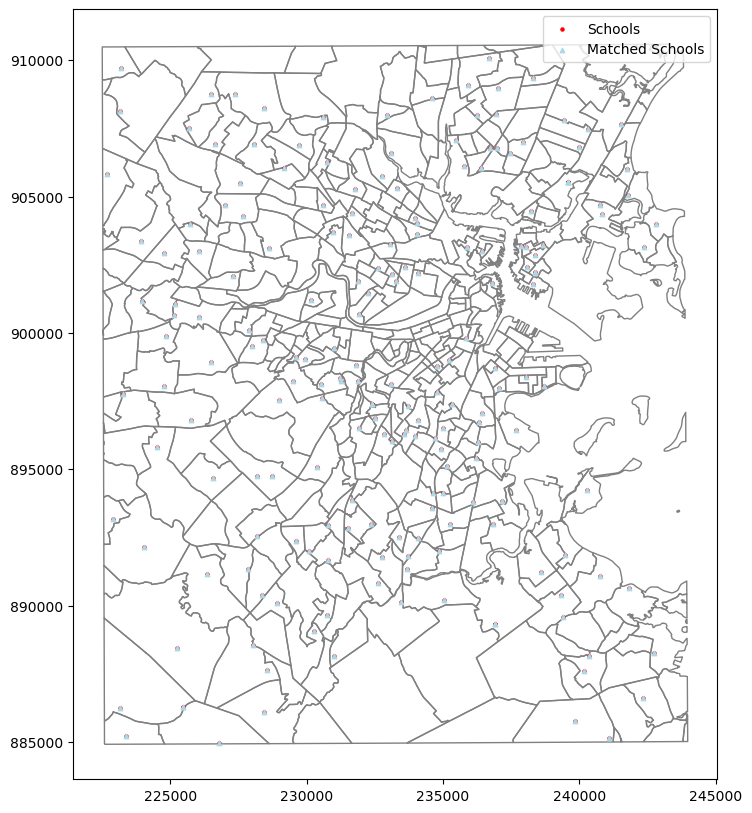

In [105]:
fig, ax = plt.subplots(figsize=(10, 10))
merged_census.plot(ax=ax, color='none', edgecolor='grey')  # Tract boundaries
sch_bos_new.plot(ax=ax, color='red', marker='o', markersize=5, label='Schools')  # Schools
schools_in_tracts.plot(ax=ax, marker='^', color='lightblue', markersize=10, label='Matched Schools')  # Matched schools
plt.legend()
plt.show()

In [107]:
# Rename the geometry column to 'destination'
schools_in_tracts.rename(columns={'geometry': 'destination'}, inplace=True)
schools_in_tracts.set_geometry('destination', inplace=True)

print("Geometry column:", schools_in_tracts.geometry.name)
print(schools_in_tracts.head())

Geometry column: destination
        schid                                  name zipcode type dist_name  \
211  01890020                         Tucker School   02186  ELE    Milton   
620  00350154            Chittick Elementary School   02126  ELE    Boston   
758  00350008  Ellison-Parks Early Education School   02126  ELE    Boston   
66   01890010                         Glover School   02186  ELE    Milton   
719  00350054              Taylor Elementary School   02126  ELE    Boston   

    dist_code  ma_addr_id                    destination  index_right  \
211  01890000     2788361  POINT (233451.271 890118.836)          332   
620  00350000    35169350  POINT (232605.544 890829.554)          334   
758  00350000    35007425  POINT (233666.673 891338.024)            5   
66   01890000     2789966  POINT (235027.459 890197.335)            4   
719  00350000    35158201  POINT (234856.186 892018.283)            6   

         GEOID20  ...   INTPTLAT20    INTPTLON20 Census Tract  

In [129]:
schools_in_tracts.columns

Index(['schid', 'name', 'zipcode', 'type', 'dist_name', 'dist_code',
       'ma_addr_id', 'destination', 'index_right', 'GEOID20', 'NAMELSAD20',
       'INTPTLAT20', 'INTPTLON20', 'Census Tract', 'Area Name', 'FIPS',
       'Total Population: 5 to 9 Years', 'Total Population: 10 to 14 Years',
       'Population 3 Years and Over Enrolled in School: Public School: K-8',
       'Population 3 Years and Over Enrolled in School: Public School: 9-12',
       'centroid'],
      dtype='object')

In [130]:
columns_to_select = ['schid', 
                     'name', 
                     'destination',
                     'centroid',
                     'Total Population: 5 to 9 Years'
                     ]

od_new = schools_in_tracts[columns_to_select]

In [131]:
od_new.head()

,schid,name,destination,centroid,Total Population: 5 to 9 Years
211,01890020,Tucker School,POINT (233451.271 890118.836),POINT (233331.478 889398.206),575
620,00350154,Chittick Elementary School,POINT (232605.544 890829.554),POINT (232091.259 891058.361),618
758,00350008,Ellison-Parks Early Education School,POINT (233666.673 891338.024),POINT (234155.791 891603.319),337
66,01890010,Glover School,POINT (235027.459 890197.335),POINT (234802.862 890481.181),446
719,00350054,Taylor Elementary School,POINT (234856.186 892018.283),POINT (235090.822 891575.807),292


In [132]:
od_pairs_path = r'C:\Users\zliu33\Downloads\OD_pairs_new.csv'
od_new.to_csv(od_pairs_path, index=False)

In [ ]:
### optional way

In [109]:
od_pairs = schools_in_tracts[['schid', 'name', 'centroid', 'destination', 'Total Population: 5 to 9 Years']]
od_pairs.columns = ['School ID', 'School Name', 'Origin (Centroid)', 'Destination (School Location)', 'Total students']
print(od_pairs.head())

    School ID                           School Name  \
211  01890020                         Tucker School   
620  00350154            Chittick Elementary School   
758  00350008  Ellison-Parks Early Education School   
66   01890010                         Glover School   
719  00350054              Taylor Elementary School   

                 Origin (Centroid)  Destination (School Location)  \
211  POINT (233331.478 889398.206)  POINT (233451.271 890118.836)   
620  POINT (232091.259 891058.361)  POINT (232605.544 890829.554)   
758  POINT (234155.791 891603.319)  POINT (233666.673 891338.024)   
66   POINT (234802.862 890481.181)  POINT (235027.459 890197.335)   
719  POINT (235090.822 891575.807)  POINT (234856.186 892018.283)   

    Total students  
211            575  
620            618  
758            337  
66             446  
719            292  


In [114]:
od_pairs.crs

<Derived Projected CRS: EPSG:26986>
Name: NAD83 / Massachusetts Mainland
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Massachusetts onshore - counties of Barnstable; Berkshire; Bristol; Essex; Franklin; Hampden; Hampshire; Middlesex; Norfolk; Plymouth; Suffolk; Worcester.
- bounds: (-73.5, 41.46, -69.86, 42.89)
Coordinate Operation:
- name: SPCS83 Massachusetts Mainland zone (meters)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [128]:
# Export OD pairs to CSV
od_pairs_path = r'C:\Users\zliu33\Downloads\OD_pairs.csv'
od_pairs.to_csv(od_pairs_path, index=False)

In [ ]:
#### test for kepler.gl